# Chapter: 7
## Section: Using explainability techniques

In [1]:
!pip install shap

In [2]:
from sklearn.model_selection import train_test_split
import xgboost
from sklearn.ensemble import RandomForestClassifier as RF
import shap
from sklearn.metrics import roc_auc_score
import numpy as np

# loading UCI adult income dataset
# classification task to predict if people made over $50k in the 90s or not
X,y = shap.datasets.adult()
# split the data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state=10)


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


ROC-AUC of predictions: 0.9248074491175615


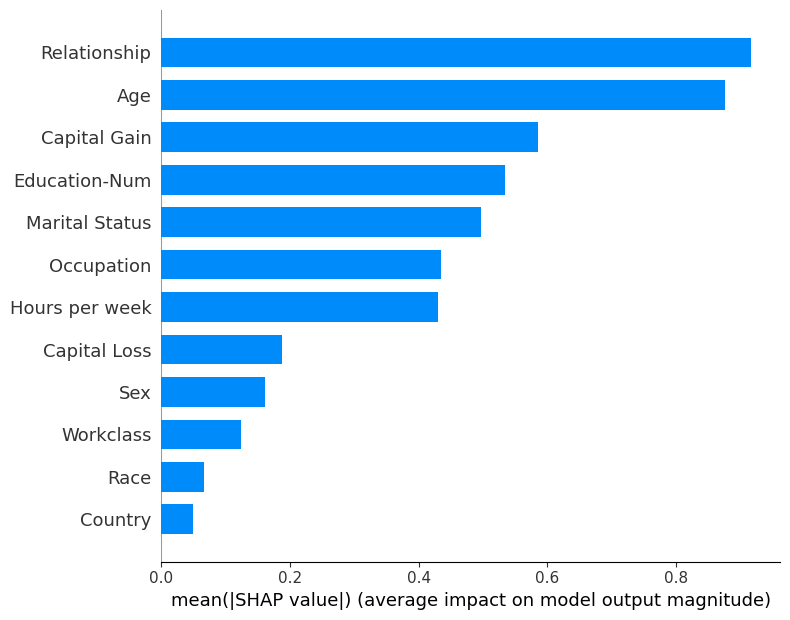

In [3]:
# initializing a XGboost model
xgb_model = xgboost.XGBClassifier(random_state=42)
# fitting the XGboost model with training data
xgb_model.fit(X_train, y_train)
# calculating roc-auc of predictions
print("ROC-AUC of predictions: {}".format(roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])))
# generate the Tree explainer
explainer_xgb = shap.TreeExplainer(xgb_model)
# extract SHAP values from the explainer object
shap_values_xgb = explainer_xgb.shap_values(X)
# create a SHAP beeswarm plot (i.e. SHAP summary plot)
shap.summary_plot(shap_values_xgb, X, plot_type="bar")

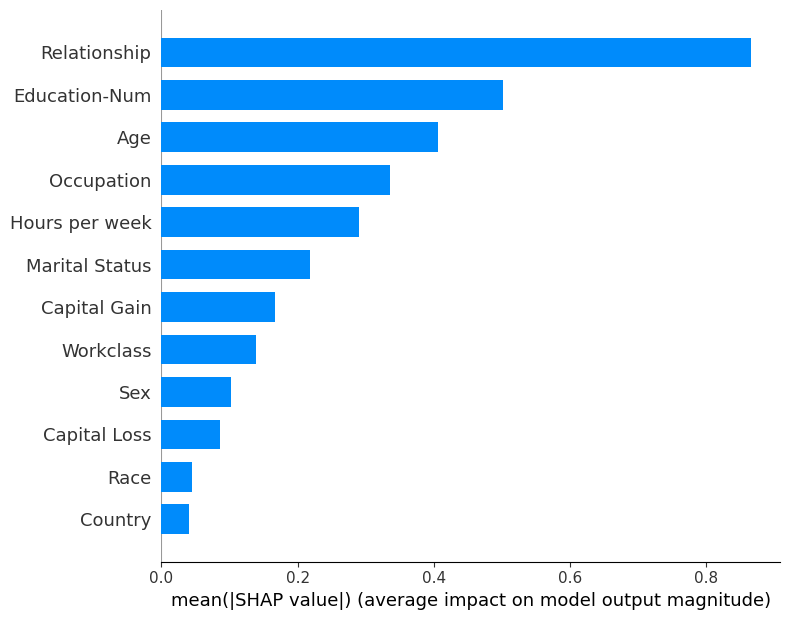

In [4]:
# generating predictions for the test set
y_pred = xgb_model.predict(X)
# identifying misclasssified datapoints in the test set
misclassified_index = np.where(y != y_pred)[0]

# extract SHAP values from the explainer object
shap_values_xgb_misclassified = explainer_xgb.shap_values(X.iloc[misclassified_index,:])
# create a SHAP beeswarm plot (i.e. SHAP summary plot)
shap.summary_plot(shap_values_xgb_misclassified, X.iloc[misclassified_index,:], plot_type="bar")

In [5]:
X_WithPred = X.copy()
X_WithPred['Correct Prediction'] = [y_pred[iter] == y[iter] for iter in range(0, len(y_pred))]

In [6]:
X_WithPred.groupby(['Sex', 'Correct Prediction']).size().unstack(fill_value=0)

Correct Prediction,False,True
Sex,,
0,537,10234
1,3000,18790


In [7]:
test_pred = xgb_model.predict_proba(X_test)[:, 1]
print("ROC-AUC of predictions for female group: {}".format(roc_auc_score([y_test[iter] for iter in range(0, len(y_test)) if X_test.Sex.values[iter] == 0],
                                                                       [test_pred[iter] for iter in range(0, len(y_test)) if X_test.Sex.values[iter] == 0])))
print("ROC-AUC of predictions for male group: {}".format(roc_auc_score([y_test[iter] for iter in range(0, len(y_test)) if X_test.Sex.values[iter] == 1],
                                                                       [test_pred[iter] for iter in range(0, len(y_test)) if X_test.Sex.values[iter] == 1])))

ROC-AUC of predictions for female group: 0.938392519339596
ROC-AUC of predictions for male group: 0.9079042373594645


In [8]:
import pandas as pd
import numpy as np

corr_features = X.corr()
corr_features.style.background_gradient(cmap='coolwarm')

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
Age,1.000000,0.003787,0.036527,-0.266288,-0.020947,0.092767,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151
Workclass,0.003787,1.000000,0.052085,-0.064731,0.254892,0.038873,0.049742,0.095981,0.033835,0.012216,0.138962,-0.007690
Education-Num,0.036527,0.052085,1.000000,-0.069304,0.109697,0.019554,0.031838,0.012280,0.122630,0.079923,0.148123,0.050840
Marital Status,-0.266288,-0.064731,-0.069304,1.000000,-0.009654,-0.223729,-0.068013,-0.129314,-0.043393,-0.034187,-0.190519,-0.023819
Occupation,-0.020947,0.254892,0.109697,-0.009654,1.000000,0.020417,0.006763,0.080296,0.025505,0.017987,0.080383,-0.012543
Relationship,0.092767,0.038873,0.019554,-0.223729,0.020417,1.000000,0.063248,0.326166,0.058407,0.053343,0.065066,0.004677
Race,0.028718,0.049742,0.031838,-0.068013,0.006763,0.063248,1.000000,0.087204,0.011145,0.018899,0.041910,0.137852
Sex,0.088832,0.095981,0.012280,-0.129314,0.080296,0.326166,0.087204,1.000000,0.048480,0.045567,0.229309,-0.008119
Capital Gain,0.077674,0.033835,0.122630,-0.043393,0.025505,0.058407,0.011145,0.048480,1.000000,-0.031615,0.078409,-0.001982
Capital Loss,0.057775,0.012216,0.079923,-0.034187,0.017987,0.053343,0.018899,0.045567,-0.031615,1.000000,0.054256,0.000419


In [9]:
# X_WithPred.groupby(['Relationship', 'Sex']).size().unstack(fill_value=0)
# Relationship categories: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried

In [10]:
print('Fraction of incorrect predictions for Sex category 0: {}'.format(689/10082))
print('Fraction of incorrect predictions for Sex category 1: {}'.format(3644/18146))

Fraction of incorrect predictions for Sex category 0: 0.06833961515572307
Fraction of incorrect predictions for Sex category 1: 0.20081560674528823


In [11]:
X_WithPred.groupby(['Relationship', 'Sex']).size().unstack(fill_value=0)

Sex,0,1
Relationship,,
0,3875,4430
1,2654,792
2,430,551
3,2245,2823
4,1,13192
5,1566,2


ROC-AUC of predictions: 0.9233259991554096


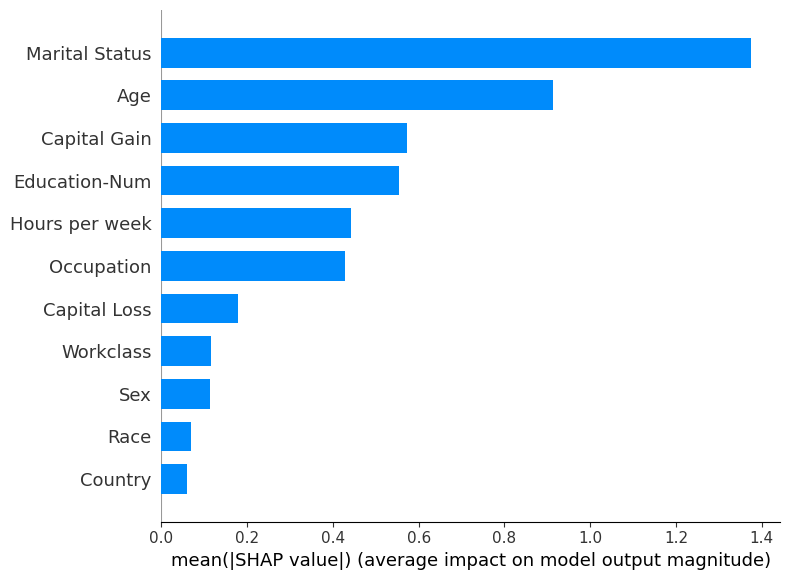

In [12]:
X_train_noRelationship = X_train.drop(['Relationship'], axis = 1)
X_test_noRelationship = X_test.drop(['Relationship'], axis = 1)
X_noRelationship = X.drop(['Relationship'], axis = 1)
# initializing a XGboost model
xgb_model = xgboost.XGBClassifier(random_state=42)
# fitting the XGboost model with training data
xgb_model.fit(X_train_noRelationship, y_train)
# calculating roc-auc of predictions
print("ROC-AUC of predictions: {}".format(roc_auc_score(y_test, xgb_model.predict_proba(X_test_noRelationship)[:, 1])))
# generate the Tree explainer
explainer_xgb = shap.TreeExplainer(xgb_model)
# extract SHAP values from the explainer object
shap_values_xgb = explainer_xgb.shap_values(X_noRelationship)
# create a SHAP beeswarm plot (i.e. SHAP summary plot)
shap.summary_plot(shap_values_xgb, X_noRelationship, plot_type="bar")

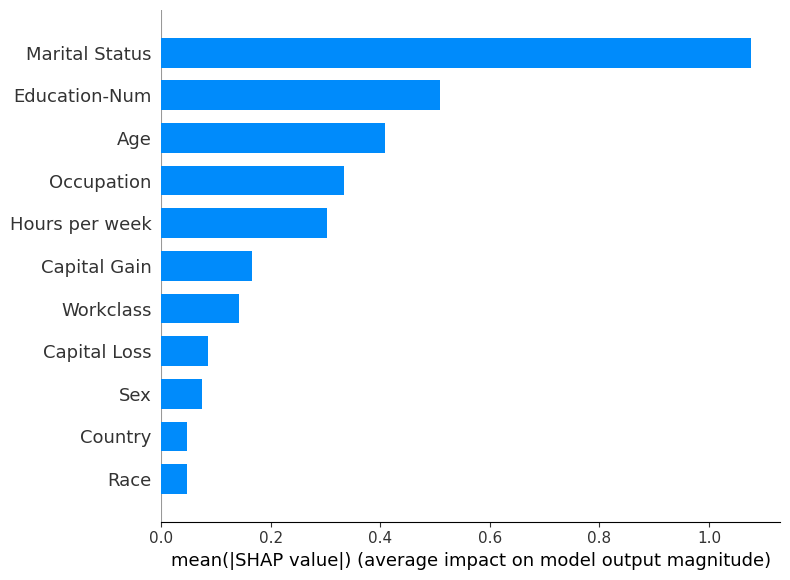

In [13]:
# generating predictions for the test set
y_pred_noRelation = xgb_model.predict(X_noRelationship)
# identifying misclasssified datapoints in the test set
misclassified_index = np.where(y != y_pred_noRelation)[0]

# extract SHAP values from the explainer object
shap_values_xgb_misclassified = explainer_xgb.shap_values(X_noRelationship.iloc[misclassified_index,:])
# create a SHAP beeswarm plot (i.e. SHAP summary plot)
shap.summary_plot(shap_values_xgb_misclassified, X_noRelationship.iloc[misclassified_index,:], plot_type="bar")

In [14]:
X_noRelation_WithPred = X_noRelationship.copy()
X_noRelation_WithPred['Correct Prediction'] = [y_pred_noRelation[iter] == y[iter] for iter in range(0, len(y_pred_noRelation))]

In [15]:
X_noRelation_WithPred.groupby(['Sex', 'Correct Prediction']).size().unstack(fill_value=0)

Correct Prediction,False,True
Sex,,
0,563,10208
1,3021,18769


In [16]:
print('Fraction of incorrect predictions for Sex category 0: {}'.format(732/10039))
print('Fraction of incorrect predictions for Sex category 1: {}'.format(3672/18118))

Fraction of incorrect predictions for Sex category 0: 0.0729156290467178
Fraction of incorrect predictions for Sex category 1: 0.202671376531626


ROC-AUC of predictions: 0.8837747851514249


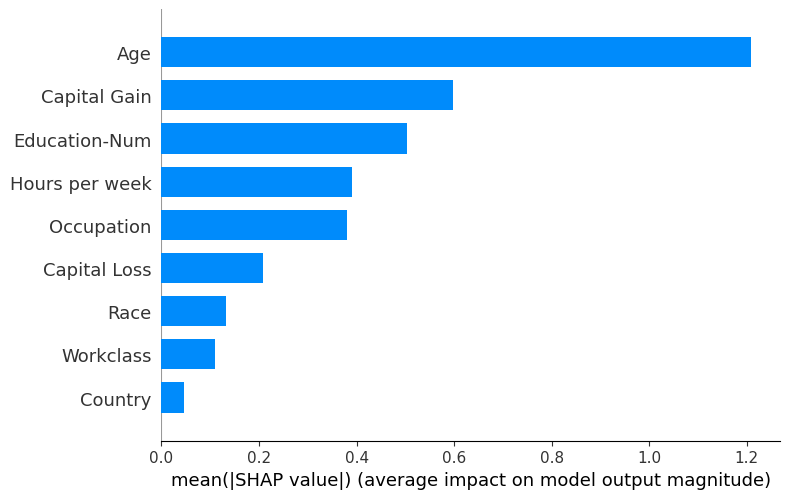

In [17]:
X_train_noRelationMarSex = X_train.drop(['Relationship', 'Marital Status', 'Sex'], axis = 1)
X_test_noRelationMarSex = X_test.drop(['Relationship', 'Marital Status', 'Sex'], axis = 1)
X_noRelationMarSex = X.drop(['Relationship', 'Marital Status', 'Sex'], axis = 1)
# initializing a XGboost model
xgb_model = xgboost.XGBClassifier(random_state=42)
# fitting the XGboost model with training data
xgb_model.fit(X_train_noRelationMarSex, y_train)
# calculating roc-auc of predictions
print("ROC-AUC of predictions: {}".format(roc_auc_score(y_test, xgb_model.predict_proba(X_test_noRelationMarSex)[:, 1])))
# generate the Tree explainer
explainer_xgb = shap.TreeExplainer(xgb_model)
# extract SHAP values from the explainer object
shap_values_xgb = explainer_xgb.shap_values(X_noRelationMarSex)
# create a SHAP beeswarm plot (i.e. SHAP summary plot)
shap.summary_plot(shap_values_xgb, X_noRelationMarSex, plot_type="bar")

ROC-AUC of predictions: 0.9226360815281702


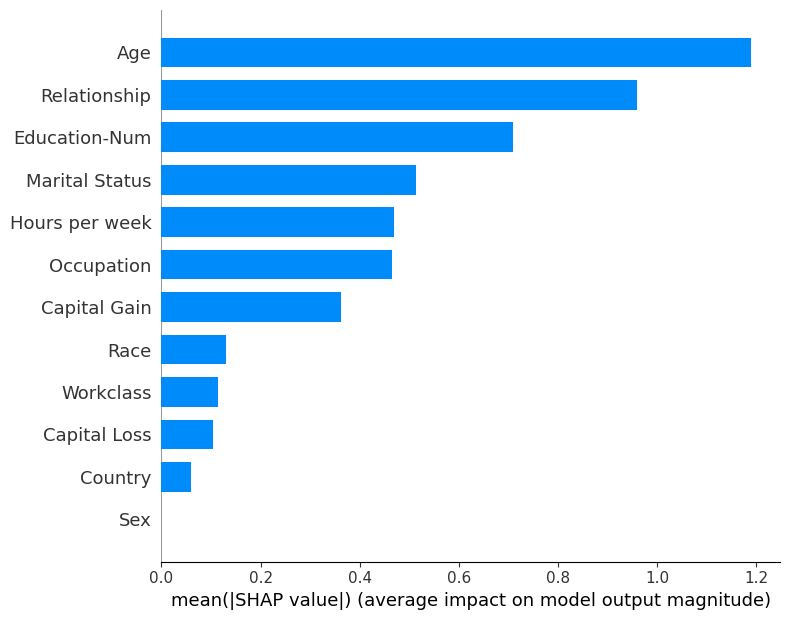

In [18]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

# trainign a model only for female category (Sex category of 0 in this dataset)
X_train_only0 = X_train[X_train['Sex'] == 0]
X_test_only0 = X_test[X_test['Sex'] == 0]
X_only0 = X[X['Sex'] == 0]
y_train_only0 = [y_train[iter] for iter in X_train.index[X_train['Sex'] == 0].tolist()]
y_test_only0 = [y_test[iter] for iter in X_test.index[X_test['Sex'] == 0].tolist()]
# initializing a XGboost model
xgb_model = xgboost.XGBClassifier(random_state=42)
# fitting the XGboost model with training data
xgb_model.fit(X_train_only0, y_train_only0)
# calculating roc-auc of predictions
print("ROC-AUC of predictions: {}".format(roc_auc_score(y_test_only0, xgb_model.predict_proba(X_test_only0)[:, 1])))
# generate the Tree explainer
explainer_xgb = shap.TreeExplainer(xgb_model)
# extract SHAP values from the explainer object
shap_values_xgb = explainer_xgb.shap_values(X_only0)
# create a SHAP beeswarm plot (i.e. SHAP summary plot)
shap.summary_plot(shap_values_xgb, X_only0, plot_type="bar")

ROC-AUC of predictions: 0.9067047310871749


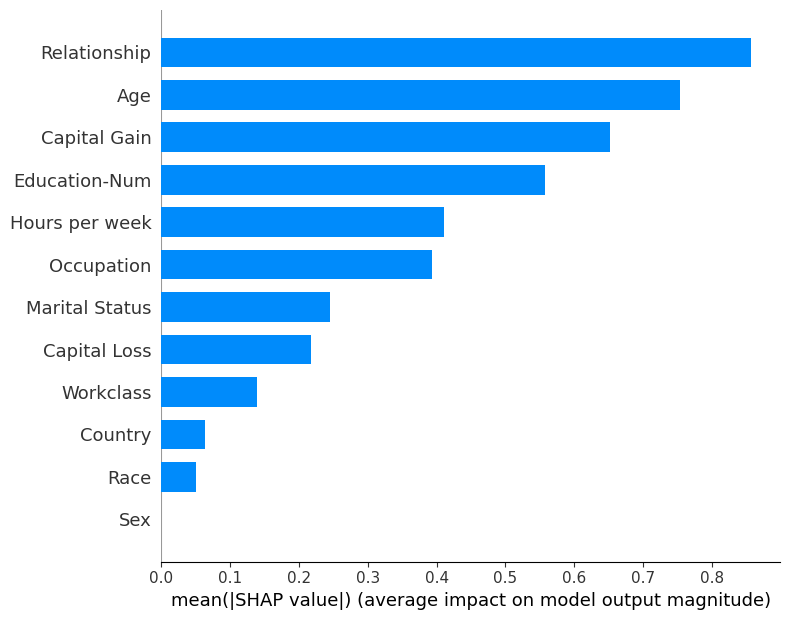

In [19]:
# trainign a model only for male category (Sex category of 1 in this dataset)
X_train_only1 = X_train[X_train['Sex'] == 1]
X_test_only1 = X_test[X_test['Sex'] == 1]
X_only1 = X[X['Sex'] == 1]
y_train_only1 = [y_train[iter] for iter in X_train.index[X_train['Sex'] == 1].tolist()]
y_test_only1 = [y_test[iter] for iter in X_test.index[X_test['Sex'] == 1].tolist()]
# initializing a XGboost model
xgb_model = xgboost.XGBClassifier(random_state=42)
# fitting the XGboost model with training data
xgb_model.fit(X_train_only1, y_train_only1)
# calculating roc-auc of predictions
print("ROC-AUC of predictions: {}".format(roc_auc_score(y_test_only1, xgb_model.predict_proba(X_test_only1)[:, 1])))
# generate the Tree explainer
explainer_xgb = shap.TreeExplainer(xgb_model)
# extract SHAP values from the explainer object
shap_values_xgb = explainer_xgb.shap_values(X_only1)
# create a SHAP beeswarm plot (i.e. SHAP summary plot)
shap.summary_plot(shap_values_xgb, X_only1, plot_type="bar")